In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Merging the dataset
gf_data = pd.read_csv('GRAND_FINALE.csv')
wc_data=pd.read_csv('WILDCARD.csv')
ps_data=pd.read_csv('PS.csv')
win_data=pd.read_csv('WINNING_TEAMS.csv')
win_data=win_data.rename(columns={"TEAM ID":"Team ID"})
ps_data=ps_data.rename(columns={"PS Number":"PS ID"})

#Corrections And Improvements required for merging the dataset
merged_data = pd.merge(gf_data, wc_data, how='outer')
merged_data=merged_data.drop("S No",axis=1)
merged_data = pd.merge(merged_data, win_data[['Team ID', 'WINNING STATUS']], on='Team ID', how='left')
merged_data = pd.merge(merged_data, ps_data[['PS ID', 'Category',"Theme"]], on='PS ID', how='left')
merged_data['WINNING STATUS'] = merged_data['WINNING STATUS'].fillna('NOT SELECTED')

merged_data.head()


,PS ID,Organization,Idea ID,Team ID,Team Name,Team Leader Name,AISHE Code,Name of the Institute,City,State,Status,WINNING STATUS,Category,Theme
0,SIH1524,Godrej Appliances,5713,13738,M square,Mudit chauhan,C-10575,Panipat Institute of Engg. & Technology,Haryana,Panipat,WILDCARD,NOT SELECTED,Hardware,Smart Resource Conservation
1,SIH1524,Godrej Appliances,19233,18051,Arka_Team,Meeraa Chadha,C-47474,"NATIONAL INSTITUTE OF FASHION TECHNOLOGY, KANGRA",Kangra,Himachal Pradesh,SELECTED,NOT SELECTED,Hardware,Smart Resource Conservation
2,SIH1524,Godrej Appliances,25132,36557,MECHSPACE,Gokuls,C-37058,Knowledge Institute of Technology,Salem,Tamil Nadu,SELECTED,Joint Winner,Hardware,Smart Resource Conservation
3,SIH1524,Godrej Appliances,26721,20483,Pure Rince,Nishit Modi,U-0135,"Gujarat Technological University, Ahmedabad",Ahmadabad,Gujarat,SELECTED,Joint Winner,Hardware,Smart Resource Conservation
4,SIH1524,Godrej Appliances,30628,25943,NeuralNexus25,Joel Stelton M,C-16547,Sri Sairam Engineering College,Kanchipuram,Tamil Nadu,SELECTED,NOT SELECTED,Hardware,Smart Resource Conservation


## VISUALIZATION THROUGH DIFFERENT GRAPHS 

In [3]:
winners_data = merged_data[merged_data['WINNING STATUS'] == 'Winner']
state_winners_count = winners_data['State'].value_counts().reset_index()
state_winners_count.columns = ['State', 'Winning Teams']

fig = px.bar(
    state_winners_count,
    x='State',
    y='Winning Teams',
    text='Winning Teams',
    title='Number of Winning Teams per State',
    color='Winning Teams',
    color_continuous_scale='Blues')
fig.update_traces(textposition='outside', marker_line_width=1.5, marker_line_color='black')
fig.update_layout(xaxis_title='State', yaxis_title='Number of Winning Teams', title_x=0.5)
fig.show()

In [4]:
category_selection_count = merged_data['Category'].value_counts()
category_winning_count = merged_data[merged_data['WINNING STATUS'] == 'Winner']['Category'].value_counts()
categories = category_selection_count.index
selection_values = category_selection_count.values
winning_values = category_winning_count.reindex(categories, fill_value=0).values

fig = go.Figure()
fig.add_trace(go.Bar(
    x=categories,
    y=selection_values,
    name='Number of Teams Selected',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=categories,
    y=winning_values,
    name='Number Of Winning Teams',
    marker_color='lightsalmon'
))

fig.update_layout(
    barmode='group',
    title='Hardware vs Software: Selection and Winning Teams',
    xaxis_title='Category',
    yaxis_title='NUmber Of Teams'
)
fig.show()

In [5]:
import plotly.graph_objects as go

# Prepare data
category_selection_count = merged_data['Category'].value_counts()
category_winning_count = merged_data[merged_data['WINNING STATUS'] == 'Winner']['Category'].value_counts()
categories = category_selection_count.index
selection_values = category_selection_count.values
winning_values = category_winning_count.reindex(categories, fill_value=0).values

# Create figure
fig = go.Figure()

# Add Selected Teams bar
fig.add_trace(go.Bar(
    x=categories,
    y=selection_values,
    name='Number of Teams Selected',
    marker_color='indianred',
    text=selection_values,  # Add text for selected values
    textposition='inside'  # Position text inside the bars
))

# Add Winning Teams bar
fig.add_trace(go.Bar(
    x=categories,
    y=winning_values,
    name='Number Of Winning Teams',
    marker_color='lightsalmon',
    text=winning_values,  # Add text for winning values
    textposition='inside'  # Position text inside the bars
))

# Update layout
fig.update_layout(
    barmode='group',
    title='Hardware vs Software: Selection and Winning Teams',
    xaxis_title='Category',
    yaxis_title='Number Of Teams',
    title_x=0.5,  # Center the title
    font=dict(size=14),
)

# Show the figure
fig.show()


In [6]:
df=merged_data[merged_data['Status'] == 'WILDCARD']
df.value_counts().values
no_win_teams = df['WINNING STATUS'].value_counts().reset_index()
no_win_teams.columns = ['Winning Status', 'Count']
print("Total No. Of wildcard teams:",len(df))
print(no_win_teams)
fig = px.bar(
    no_win_teams, 
    x='Winning Status', 
    y='Count', 
    text='Count', 
    title='DISTRIBUTION OF WILDCARD TEAMS',
    labels={'Count': 'Number of Teams'},
    color='Count',  
    color_continuous_scale='Blues')
fig.update_traces(textposition='outside', marker_line_width=1.5, marker_line_color='black')
fig.show()


Total No. Of wildcard teams: 65
       Winning Status  Count
0        NOT SELECTED     51
1              Winner      7
2        Joint Winner      6
3  Special Jury Award      1


In [7]:
df=merged_data
df.value_counts().values
no_win_teams = df['WINNING STATUS'].value_counts().reset_index()
no_win_teams.columns = ['Winning Status', 'No. Of Teams']
print("Total No. Of Winning teams: 177")
print(no_win_teams)
fig = px.bar(
    no_win_teams, 
    x='Winning Status', 
    y='No. Of Teams', 
    text='No. Of Teams', 
    title='DISTRIBUTION OF TEAMS',
    labels={'No. Of Teams': 'Number of Teams'},
    color='No. Of Teams',  
    color_continuous_scale='Blues')
fig.update_traces(textposition='outside', marker_line_width=1.5, marker_line_color='black')
fig.show()


Total No. Of Winning teams: 177
                Winning Status  No. Of Teams
0                 NOT SELECTED          1089
1                       Winner           177
2                 Joint Winner           128
3            Consolation Prize             3
4           Special Jury Award             1
5               WESCHOOL AWARD             1
6          Special Prize Award             1
7   WeSchool Consolation Award             1
8            Nari Shakti Award             1
9              First Runner-up             1
10            Second Runner-up             1


In [8]:
winning_teams = merged_data[merged_data['WINNING STATUS'] == 'Winner']
theme_winning_counts = winning_teams['Theme'].value_counts()

fig = px.pie(
    names=theme_winning_counts.index,
    values=theme_winning_counts.values,
    title='DISTRIBUTION OF THEMES(On the basis of Winning Teams)')
fig.show()

In [9]:
import plotly.express as px

# Prepare data
winning_teams = merged_data[merged_data['WINNING STATUS'] == 'Winner']
theme_winning_counts = winning_teams['Theme'].value_counts()

# Create the hollow (doughnut) chart
fig = px.pie(
    names=theme_winning_counts.index,
    values=theme_winning_counts.values,
    title='Distribution of Themes (On the Basis of Winning Teams)',
    hole=0.4,  # Creates the hollow center
    color_discrete_sequence=px.colors.qualitative.Pastel  # Use a pastel color palette
)

# Update layout for better aesthetics
fig.update_layout(
    title=dict(font_size=18, x=0.5, font_color="darkblue", font_family="Arial Black"),
    legend=dict(font_size=12, title_text='Themes'),
)

# Show the figure
fig.show()


In [10]:
joint_winner_data = merged_data[merged_data['WINNING STATUS'] == 'Joint Winner']
ps_id_counts = joint_winner_data['PS ID'].value_counts()

fig = px.line(
    x=ps_id_counts.index,  
    y=ps_id_counts.values,  
    labels={'x': 'PS ID', 'y': 'Number of Winning teams(On a Single PS ID)'},
    title='PS ID with Joint Winners')

fig.update_layout(
    xaxis_tickangle=-45 )
fig.show()

In [11]:
winners_data = merged_data[merged_data['WINNING STATUS'] == 'Winner']
college_counts = winners_data.groupby(['AISHE Code', 'Name of the Institute']).size().reset_index(name='Winner Count')

top_10_colleges = college_counts.nlargest(10, 'Winner Count')

fig = px.bar(
    top_10_colleges, 
    x='AISHE Code', 
    y='Winner Count', 
    text='Winner Count', 
    title='Top 10 Colleges with Highest Number of Winners',
    labels={'AISHE Code': 'AISHE Code', 'Winner Count': 'Number of Winners'},
    color='Winner Count',  
    color_continuous_scale='Viridis')

fig.update_traces(textposition='outside', marker_line_width=1.5, marker_line_color='black')

fig.update_layout(
    xaxis_tickangle=-45,  
    title_x=0.5,  
    width=1000,  
    height=600,  
    xaxis={'title': {'text': 'AISHE Code'}, 'tickangle': -45}  )
fig.show()

print("Top 10 Colleges with Winner Counts:")
df1=top_10_colleges[['Name of the Institute', 'AISHE Code', 'Winner Count']].reset_index()
df1.drop(columns="index",axis=1)


Top 10 Colleges with Winner Counts:


,Name of the Institute,AISHE Code,Winner Count
0,Sri Krishna College of Engineering and Technology,C-36995,5
1,Shri Vile Parle Kelavani Mandals Dwarkadas J. ...,C-33777,4
2,"Dayananda Sagar College of Engineering, BANGALORE",C-1413,3
3,Sri Sairam Engineering College,C-16547,3
4,Chennai Institute of Technology,C-16576,3
5,Bhilai Institute of Technology Durg,C-16658,3
6,Veermata Jijabai Technological Institute Matun...,C-33641,3
7,"Acropolis Institute of Technology & Research, ...",C-36237,3
8,"Indian Institute of Technology, Mumbai",U-0306,3
9,Thapar Institute of Engineering and Technology...,U-0385,3


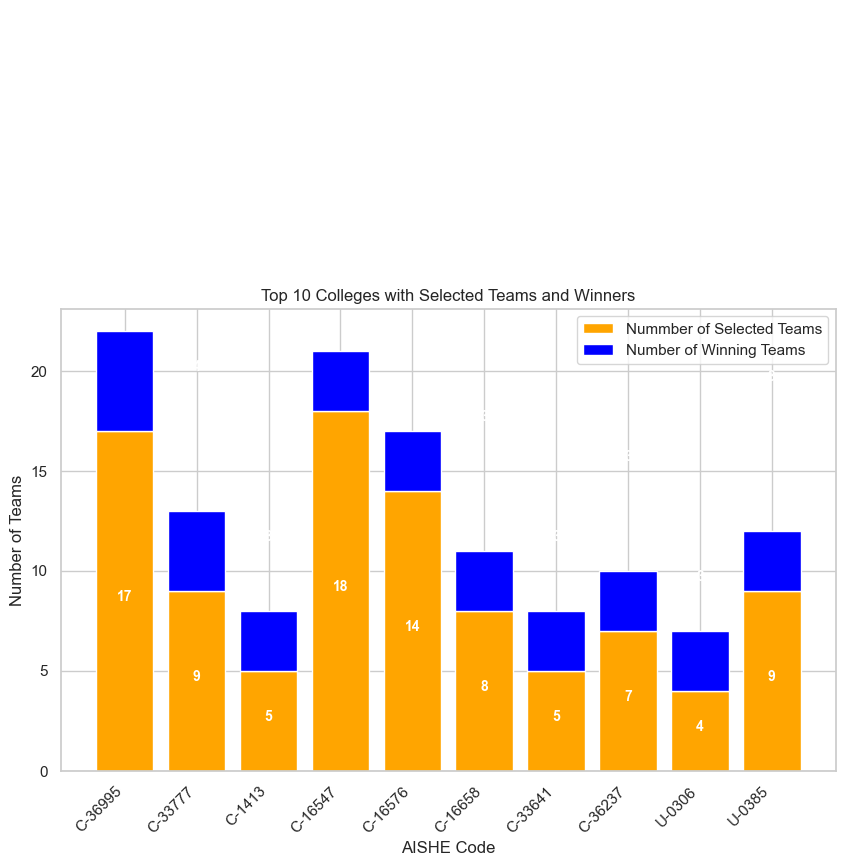

Top 10 Colleges with Winner Count and Selected Teams Count:


,Name of the Institute,AISHE Code,Winner Count,No. of Selected Teams
0,Sri Krishna College of Engineering and Technology,C-36995,5,17
1,Shri Vile Parle Kelavani Mandals Dwarkadas J. ...,C-33777,4,9
2,"Dayananda Sagar College of Engineering, BANGALORE",C-1413,3,5
3,Sri Sairam Engineering College,C-16547,3,18
4,Chennai Institute of Technology,C-16576,3,14
5,Bhilai Institute of Technology Durg,C-16658,3,8
6,Veermata Jijabai Technological Institute Matun...,C-33641,3,5
7,"Acropolis Institute of Technology & Research, ...",C-36237,3,7
8,"Indian Institute of Technology, Mumbai",U-0306,3,4
9,Thapar Institute of Engineering and Technology...,U-0385,3,9


In [12]:
winners_data = merged_data[merged_data['WINNING STATUS'] == 'Winner']
college_counts = winners_data.groupby(['AISHE Code', 'Name of the Institute']).size().reset_index(name='Winner Count')
top10clg = college_counts.nlargest(10, 'Winner Count')[['AISHE Code', 'Name of the Institute', 'Winner Count']]

selected_teams = merged_data.groupby(['AISHE Code', 'Name of the Institute']).size().reset_index(name='No. of Selected Teams')

top10clg_with_selection = pd.merge(top10clg, selected_teams, on=['AISHE Code', 'Name of the Institute'], how='left')

aishe_codes = top10clg_with_selection['AISHE Code']
winner_count = top10clg_with_selection['Winner Count']
selected_count = top10clg_with_selection['No. of Selected Teams']

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(aishe_codes, selected_count, label='Nummber of Selected Teams', color='orange')
ax.bar(aishe_codes, winner_count, bottom=selected_count, label='Number of Winning Teams', color='blue')

# Add labels on top of bars for Selected Teams Count
for i, bar in enumerate(ax.patches[:len(aishe_codes)]):
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bar.get_y(),
            round(bar.get_height()), ha='center',
            color='w', weight='bold', size=10)

# Add labels on top of bars for Winner Count (on top of Selected Teams Count)
for i, bar in enumerate(ax.patches[len(aishe_codes):]):
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bar.get_y() + selected_count[i],
            round(bar.get_height()), ha='center',
            color='w', weight='bold', size=10)

# Add labels, title, and legend
ax.set_ylabel('Number of Teams')
ax.set_xlabel('AISHE Code')
ax.set_title('Top 10 Colleges with Selected Teams and Winners')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

# Display the top 10 colleges with Winner and Selected Teams Count
print("Top 10 Colleges with Winner Count and Selected Teams Count:")
top10clg_with_selection[['Name of the Institute', 'AISHE Code', 'Winner Count', 'No. of Selected Teams']]


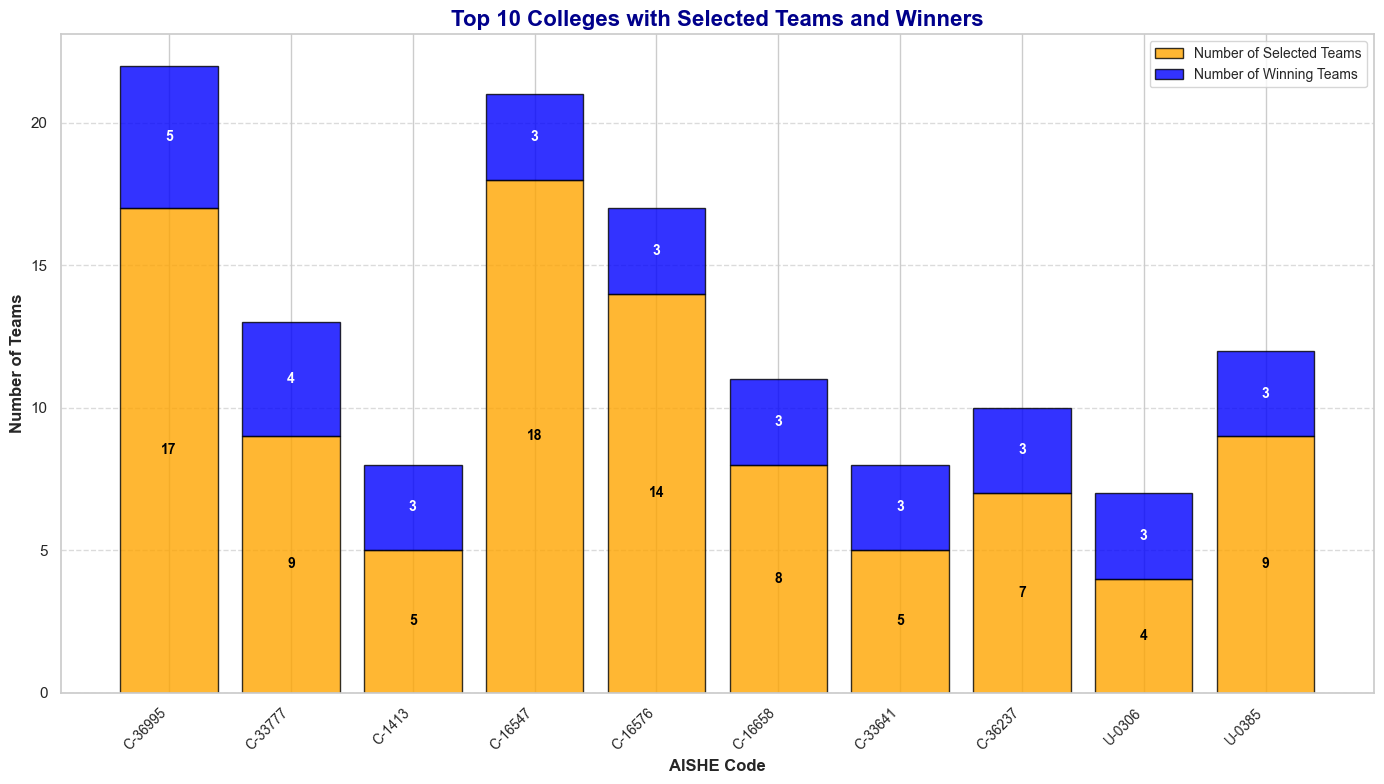

Top 10 Colleges with Winner Count and Selected Teams Count:


,Name of the Institute,AISHE Code,Winner Count,No. of Selected Teams
0,Sri Krishna College of Engineering and Technology,C-36995,5,17
1,Shri Vile Parle Kelavani Mandals Dwarkadas J. ...,C-33777,4,9
2,"Dayananda Sagar College of Engineering, BANGALORE",C-1413,3,5
3,Sri Sairam Engineering College,C-16547,3,18
4,Chennai Institute of Technology,C-16576,3,14
5,Bhilai Institute of Technology Durg,C-16658,3,8
6,Veermata Jijabai Technological Institute Matun...,C-33641,3,5
7,"Acropolis Institute of Technology & Research, ...",C-36237,3,7
8,"Indian Institute of Technology, Mumbai",U-0306,3,4
9,Thapar Institute of Engineering and Technology...,U-0385,3,9


In [13]:
import matplotlib.pyplot as plt

# Prepare data
aishe_codes = top10clg_with_selection['AISHE Code']
winner_count = top10clg_with_selection['Winner Count']
selected_count = top10clg_with_selection['No. of Selected Teams']

# Create figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

# Plot selected teams as the base bar
bars_selected = ax.bar(
    aishe_codes, selected_count, label='Number of Selected Teams', color='orange', edgecolor='black', alpha=0.8
)

# Plot winning teams stacked on top
bars_winner = ax.bar(
    aishe_codes, winner_count, bottom=selected_count, label='Number of Winning Teams', color='blue', edgecolor='black', alpha=0.8
)

# Annotate the selected teams count
for bar in bars_selected:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height / 2,  # Position at the middle of the bar
        f'{int(height)}', 
        ha='center', va='center', color='black', fontsize=10, weight='bold'
    )

# Annotate the winning teams count
for bar, bottom in zip(bars_winner, selected_count):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bottom + height / 2,  # Position at the middle of the winning teams bar
        f'{int(height)}', 
        ha='center', va='center', color='white', fontsize=10, weight='bold'
    )

# Add labels, title, and legend
ax.set_ylabel('Number of Teams', fontsize=12, weight='bold')
ax.set_xlabel('AISHE Code', fontsize=12, weight='bold')
ax.set_title('Top 10 Colleges with Selected Teams and Winners', fontsize=16, weight='bold', color='darkblue')
ax.legend(fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Improve layout aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for clarity
plt.tight_layout()

# Show plot
plt.show()

# Display the top 10 colleges with Winner and Selected Teams Count
print("Top 10 Colleges with Winner Count and Selected Teams Count:")
top10clg_with_selection[['Name of the Institute', 'AISHE Code', 'Winner Count', 'No. of Selected Teams']]


In [14]:
win_data=merged_data[merged_data['WINNING STATUS']=='Winner']
wincnt=win_data.groupby('City').size().reset_index(name='Number of Winning teams')
top10ct=wincnt.nlargest(10,'Number of Winning teams')
selcnt=merged_data.groupby("City").size().reset_index(name='Number of selected teams')
data=pd.merge(top10ct,selcnt,on="City",how="left")
city=data['City']
selected_count=data['Number of selected teams']
winner_count=data['Number of Winning teams']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=city,
    y=selected_count,
    name='Number of Teams Selected',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=city,
    y=winner_count,
    name='Number Of Winning Teams',
    marker_color='lightsalmon'
))

fig.update_layout(
    barmode='group',
    title='TOP 10 CITIES(Selected and Winning Teams)',
    xaxis_title='Names Of Cities',
    yaxis_title='NUmber Of Teams'
)
fig.show()

In [23]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import plotly.graph_objects as go
from tabulate import tabulate  # For table formatting

# Data preparation
city = data['City']
selected_count = data['Number of selected teams']
winner_count = data['Number of Winning teams']

# Prepare data for tabulate
table_data = [[c, s, w] for c, s, w in zip(city, selected_count, winner_count)]
headers = ["City", "Selected Teams", "Winning Teams"]

# Print the table
print("City-wise Count of Selected and Winning Teams:")
print(tabulate(table_data, headers=headers, tablefmt="grid"))

# Create the figure
fig = go.Figure()

# Add bar for selected teams
fig.add_trace(go.Bar(
    x=city,
    y=selected_count,
    name='Number of Teams Selected',
    marker_color='indianred',
    text=selected_count,  # Add the count as text
    textposition='outside'  # Position the text above the bar
))

# Add bar for winning teams
fig.add_trace(go.Bar(
    x=city,
    y=winner_count,
    name='Number Of Winning Teams',
    marker_color='lightsalmon',
    text=winner_count,  # Add the count as text
    textposition='outside'  # Position the text above the bar
))

# Update layout for the plot
fig.update_layout(
    barmode='group',
    title='TOP 10 CITIES (Selected and Winning Teams)',
    xaxis_title='Names Of Cities',
    yaxis_title='Number Of Teams',
    title_x=0.5,  # Center the title
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    showlegend=True,  # Ensure the legend is visible
    font=dict(size=12),  # Adjust font size for readability
    height=600,  # Adjust height for clarity
    width=800   # Adjust width for a compact view
)

# Show the plot
fig.show()


City-wise Count of Selected and Winning Teams:
+--------------------+------------------+-----------------+
| City               |   Selected Teams |   Winning Teams |
+====================+==================+=================+
| Coimbatore         |               81 |              15 |
+--------------------+------------------+-----------------+
| Pune               |               95 |              15 |
+--------------------+------------------+-----------------+
| Mumbai Suburban    |               51 |              12 |
+--------------------+------------------+-----------------+
| Kanchipuram        |               71 |              11 |
+--------------------+------------------+-----------------+
| Mumbai             |               44 |              10 |
+--------------------+------------------+-----------------+
| Bengaluru Urban    |               39 |               8 |
+--------------------+------------------+-----------------+
| Bhopal             |               25 |            

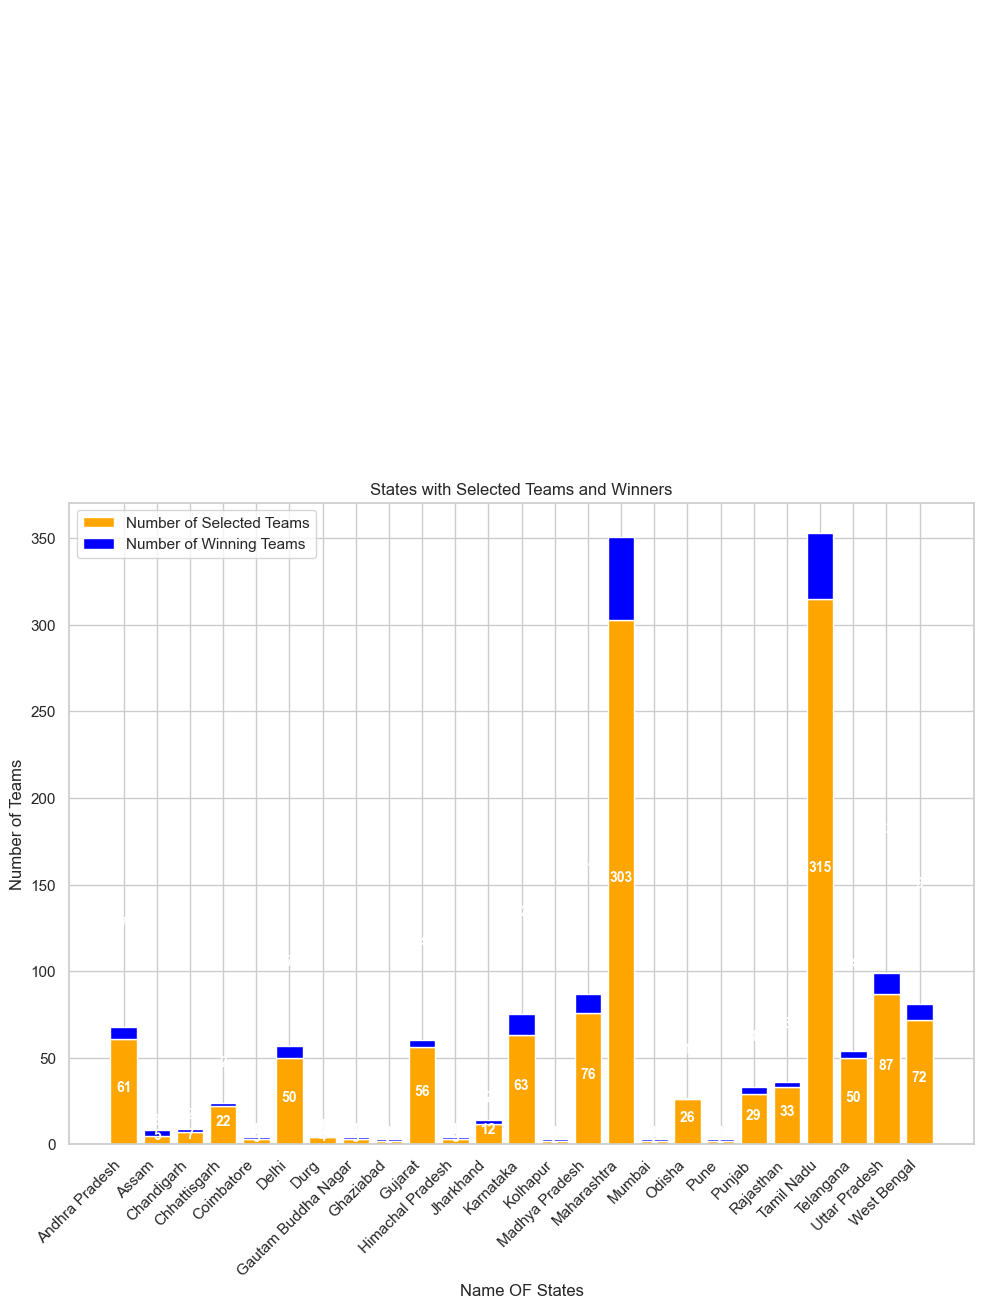

States with Winner Count and Selected Teams Count:
                  State  Winner Count  Selected Teams Count
0        Andhra Pradesh             7                    61
1                 Assam             3                     5
2            Chandigarh             2                     7
3          Chhattisgarh             2                    22
4            Coimbatore             1                     3
5                 Delhi             7                    50
6                  Durg             1                     4
7   Gautam Buddha Nagar             1                     3
8             Ghaziabad             1                     2
9               Gujarat             4                    56
10     Himachal Pradesh             1                     3
11            Jharkhand             2                    12
12            Karnataka            12                    63
13             Kolhapur             1                     2
14       Madhya Pradesh            11            

In [16]:
winners_data = merged_data[merged_data['WINNING STATUS'] == 'Winner']
state_counts = winners_data.groupby('State').size().reset_index(name='Winner Count')
selected_teams_state = merged_data.groupby('State').size().reset_index(name='Selected Teams Count')

#merging the number of winning and selected teams
state_with_counts = pd.merge(state_counts, selected_teams_state, on='State', how='left')

states = state_with_counts['State']
winner_count = state_with_counts['Winner Count']
selected_count = state_with_counts['Selected Teams Count']

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 20))

# Create the stacked bar chart
ax.bar(states, selected_count, label='Number of Selected Teams', color='orange')
ax.bar(states, winner_count, bottom=selected_count, label='Number of Winning Teams', color='blue')

# Add labels on top of bars for Selected Teams Count
for i, bar in enumerate(ax.patches[:len(states)]):
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bar.get_y(),
            round(bar.get_height()), ha='center',
            color='w', weight='bold', size=10)

# Add labels on top of bars for Winner Count (on top of Selected Teams Count)
for i, bar in enumerate(ax.patches[len(states):]):
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bar.get_y() + selected_count[i],
            round(bar.get_height()), ha='center',
            color='w', weight='bold', size=10)

# Add labels, title, and legend
ax.set_ylabel('Number of Teams')
ax.set_xlabel('Name OF States')
ax.set_title('States with Selected Teams and Winners')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to avoid label cut-off
plt.tight_layout()

# Show plot
plt.show()

# Display the states with Winner and Selected Teams Count
print("States with Winner Count and Selected Teams Count:")
print(state_with_counts[['State', 'Winner Count', 'Selected Teams Count']])


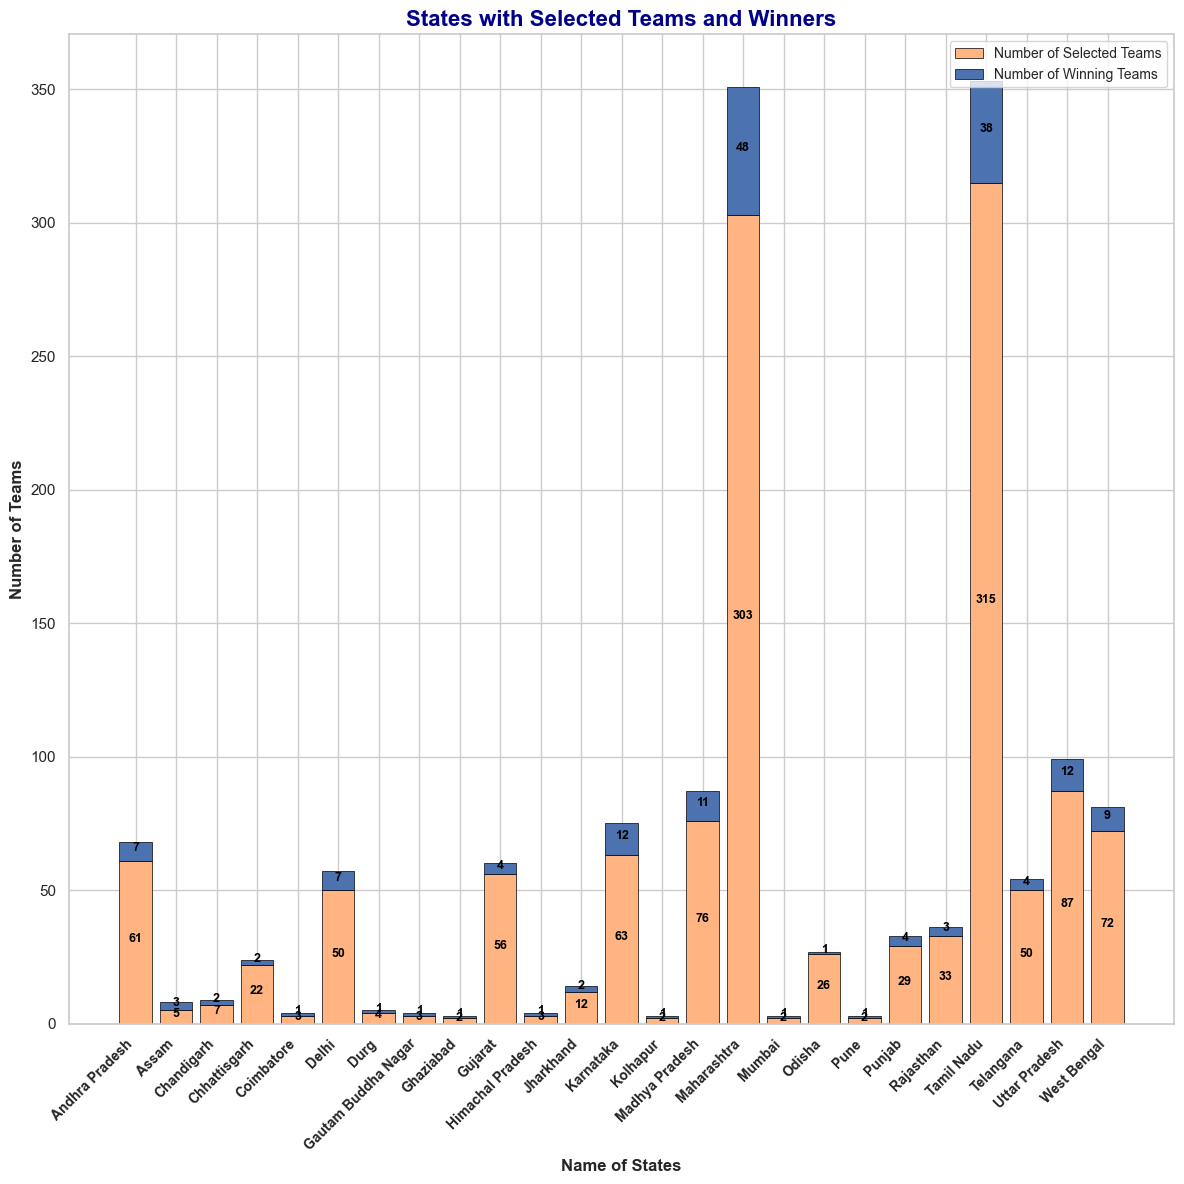

States with Winner Count and Selected Teams Count:


,State,Winner Count,Selected Teams Count
0,Andhra Pradesh,7,61
1,Assam,3,5
2,Chandigarh,2,7
3,Chhattisgarh,2,22
4,Coimbatore,1,3
5,Delhi,7,50
6,Durg,1,4
7,Gautam Buddha Nagar,1,3
8,Ghaziabad,1,2
9,Gujarat,4,56


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn style
sns.set_theme(style="whitegrid")

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 12))

# Define colors for the bars
selected_color = sns.color_palette("pastel")[1]
winner_color = sns.color_palette("deep")[0]

# Create the stacked bar chart
ax.bar(states, selected_count, label='Number of Selected Teams', color=selected_color, edgecolor='black', linewidth=0.5)
ax.bar(states, winner_count, bottom=selected_count, label='Number of Winning Teams', color=winner_color, edgecolor='black', linewidth=0.5)

# Add labels on top of bars for Selected Teams Count
for i, (sel_count, win_count) in enumerate(zip(selected_count, winner_count)):
    # Label for Selected Teams
    ax.text(i, sel_count / 2, 
            round(sel_count), ha='center', 
            color='black', fontsize=9, weight='bold')
    
    # Label for Winning Teams
    ax.text(i, sel_count + (win_count / 2), 
            round(win_count), ha='center', 
            color='black', fontsize=9, weight='bold')

# Add labels, title, and legend
ax.set_ylabel('Number of Teams', fontsize=12, weight='bold')
ax.set_xlabel('Name of States', fontsize=12, weight='bold')
ax.set_title('States with Selected Teams and Winners', fontsize=16, weight='bold', color='darkblue')
ax.legend(fontsize=10, loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10, weight='bold')

# Adjust layout to avoid label cut-off
plt.tight_layout()

# Show plot
plt.show()

# Display the states with Winner and Selected Teams Count
print("States with Winner Count and Selected Teams Count:")
state_with_counts[['State', 'Winner Count', 'Selected Teams Count']]


In [18]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# ML MODEL

## Number of Teams Selected Prediction<br>
Input Features: Theme, Category, State.<br>
Goal: Predict the total number of Teams selected for a given input.<br>



In [19]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

merged_data['Selection Count'] = merged_data['Status'].apply(lambda x: 1 if x in ['SELECTED', 'WILDCARD'] else 0)
theme_data = merged_data.groupby(['Theme', 'Category', 'State']).agg({'Selection Count': 'sum'}).reset_index()

X = theme_data[['Theme', 'Category', 'State']]
y = theme_data['Selection Count']

categorical_features = ['Theme', 'Category', 'State']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("ERROR INFO:")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

new_input = pd.DataFrame({
    'Theme': ['Miscellaneous'],
    'Category': ['Software'],
    'State': ['Tamil Nadu']
})
predicted_selections = pipeline.predict(new_input)
print(f"Predicted Nummber of Teams Selected: {predicted_selections[0]}")


ERROR INFO:
Mean Squared Error: 59.183911627906994
R2 Score: 0.028111037445740616
Predicted Nummber of Teams Selected: 17.22
